In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.read_csv("../k2scoc/results/tables/improved_flares_vetted.csv")
df = df[~df.real.isnull()]
df.shape

(5479, 16)

In [26]:
r = pd.DataFrame(df.groupby(["EPIC","C"]).real.sum()).reset_index()
s = r[r.real==0][["EPIC","C"]]
df2 = df[df.EPIC.isin(s.EPIC) & df.C.isin(s.C)]
df2.shape

(1508, 16)

In [27]:
df.groupby("real").count()

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dtp_tot,EPIC,C,length,note,cluster
real,,,,,,,,,,,,,,,
-1.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
0.0,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,1276,2434
1.0,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,3037,407,3037


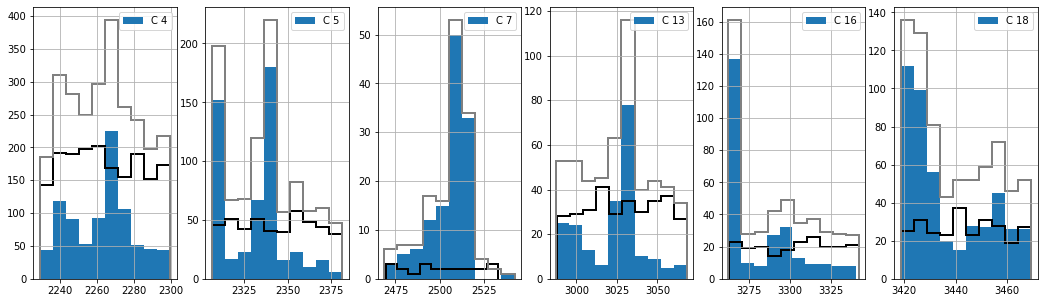

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=6,figsize=(18,5))
i=0
for label, group in df[df.real == 0].groupby("C"):
    group.tstart.hist(bins=10, ax=ax[i],label=f"C {label}")
    ax[i].legend()
    i += 1
i=0
for label, group in df[df.real == 1].groupby("C"):
    group.tstart.hist(bins=10, ax=ax[i],histtype="step", edgecolor="k", linewidth=2)
    ax[i].legend()
    i += 1
    
i=0
for label, group in df.groupby("C"):
    group.tstart.hist(bins=10, ax=ax[i],histtype="step", edgecolor="grey", linewidth=2)
    ax[i].legend()
    i += 1    
    
plt.savefig("plots/false_positives.png",dpi=300)

In [23]:
5500*.65

3575.0